In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Dando uma olhada no head do dataset
df = pd.read_csv("./valorant-champions-2022.csv")
df.head()

,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76%,"\t$60,000.00",Initiator,25.50,222,155,67,1
1,saadhak,LOUD,Argentina,150,143,1.05,76%,"\t$60,000.00",Initiator,22.50,222,155,67,1
2,pANcada,LOUD,Brazil,169,137,1.23,81%,"\t$60,000.00",Controller,36.75,222,155,67,1
3,Less,LOUD,Brazil,176,134,1.31,73%,"\t$60,000.00",Sentinel,26.50,222,155,67,1
4,aspas,LOUD,Brazil,166,158,1.05,71%,"\t$60,000.00",Duelist,26.25,222,155,67,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         40 non-null     object 
 1   Team           40 non-null     object 
 2   Nationality    40 non-null     object 
 3   Kill           40 non-null     int64  
 4   Death          40 non-null     int64  
 5   K/D            40 non-null     float64
 6   KAST           40 non-null     object 
 7   Prize          40 non-null     object 
 8   Role           40 non-null     object 
 9   HS %           40 non-null     float64
 10  Rounds Played  40 non-null     int64  
 11  Rounds Win     40 non-null     int64  
 12  Rounds Lose    40 non-null     int64  
 13  Rank           40 non-null     object 
dtypes: float64(2), int64(5), object(7)
memory usage: 4.5+ KB


In [4]:
Kast_array = np.array(df.KAST)
Kast_array = Kast_array.astype(str)
Kast_float = np.char.replace(Kast_array, "%", "").astype(float) / 100.0

In [5]:
KAST = pd.Series(Kast_float)
df["KAST"] = KAST
df["KAST"].head()

0    0.76
1    0.76
2    0.81
3    0.73
4    0.71
Name: KAST, dtype: float64

In [6]:
df["Prize"] = df["Prize"].str.replace("$","")
df["Prize"] = df["Prize"].str.replace("\t","")
df["Prize"] = df["Prize"].str.replace(",","")
df["Prize"] = df["Prize"].astype(float)
df.Prize.head()

0    60000.0
1    60000.0
2    60000.0
3    60000.0
4    60000.0
Name: Prize, dtype: float64

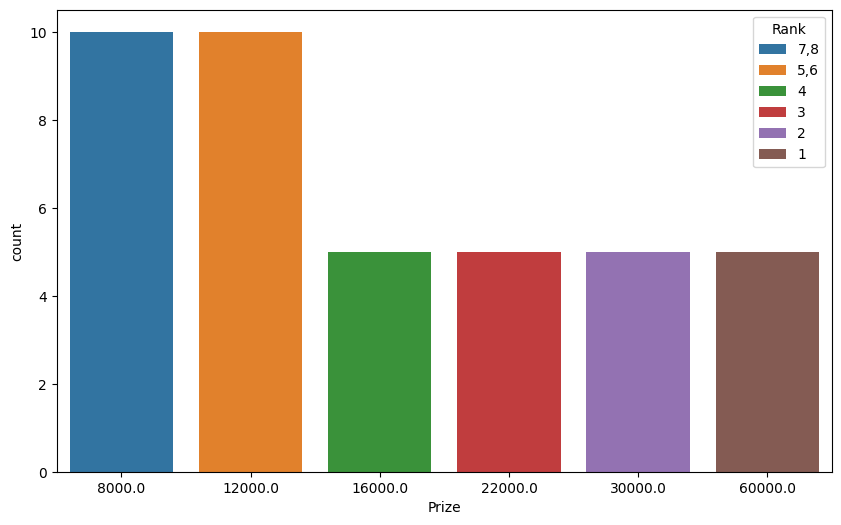

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Prize",hue="Rank");

In [8]:
df.Rank = df.Rank.replace("5,6","5")
df.Rank.replace("7,8","6", inplace=True)
df.Rank.unique()

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [9]:
Rank = pd.Series(df.Rank)
df.Rank = Rank.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         40 non-null     object 
 1   Team           40 non-null     object 
 2   Nationality    40 non-null     object 
 3   Kill           40 non-null     int64  
 4   Death          40 non-null     int64  
 5   K/D            40 non-null     float64
 6   KAST           40 non-null     float64
 7   Prize          40 non-null     float64
 8   Role           40 non-null     object 
 9   HS %           40 non-null     float64
 10  Rounds Played  40 non-null     int64  
 11  Rounds Win     40 non-null     int64  
 12  Rounds Lose    40 non-null     int64  
 13  Rank           40 non-null     int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 4.5+ KB


<Axes: >

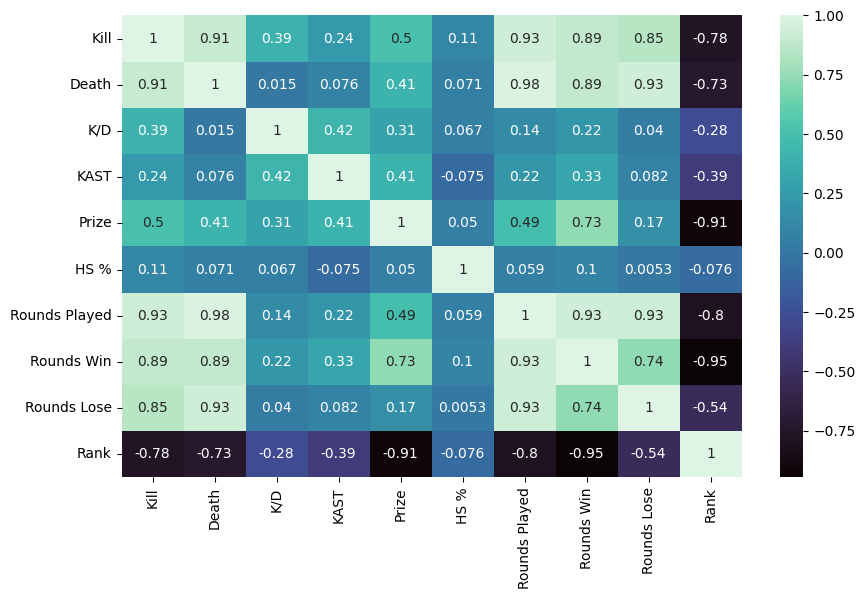

In [10]:
# Selecione apenas recursos numéricos para correlação
numerical_df = df.select_dtypes(include=np.number)

# Calcular a correlação em recursos numéricos
plt.figure(figsize=(10, 6))
sns.heatmap(data=numerical_df.corr(), annot=True, cmap="mako")

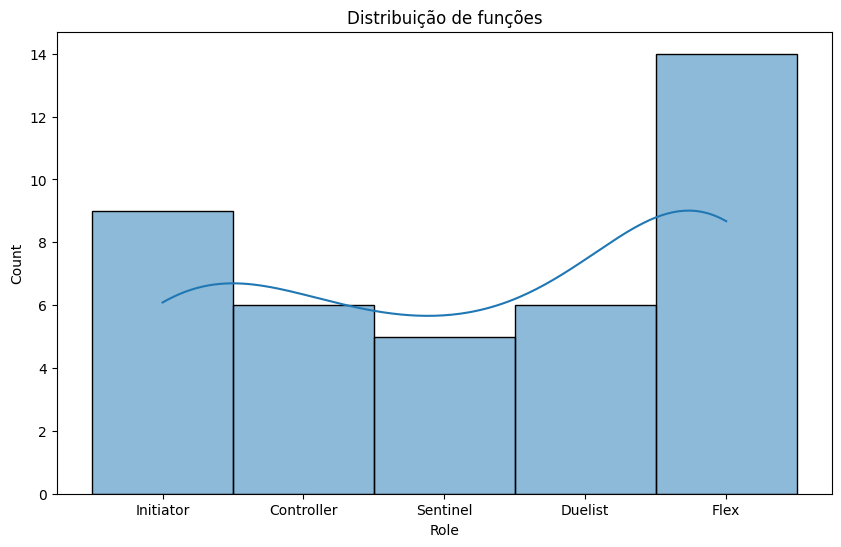

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df["Role"], bins=100, kde=True)
plt.title("Distribuição de funções")
plt.show();

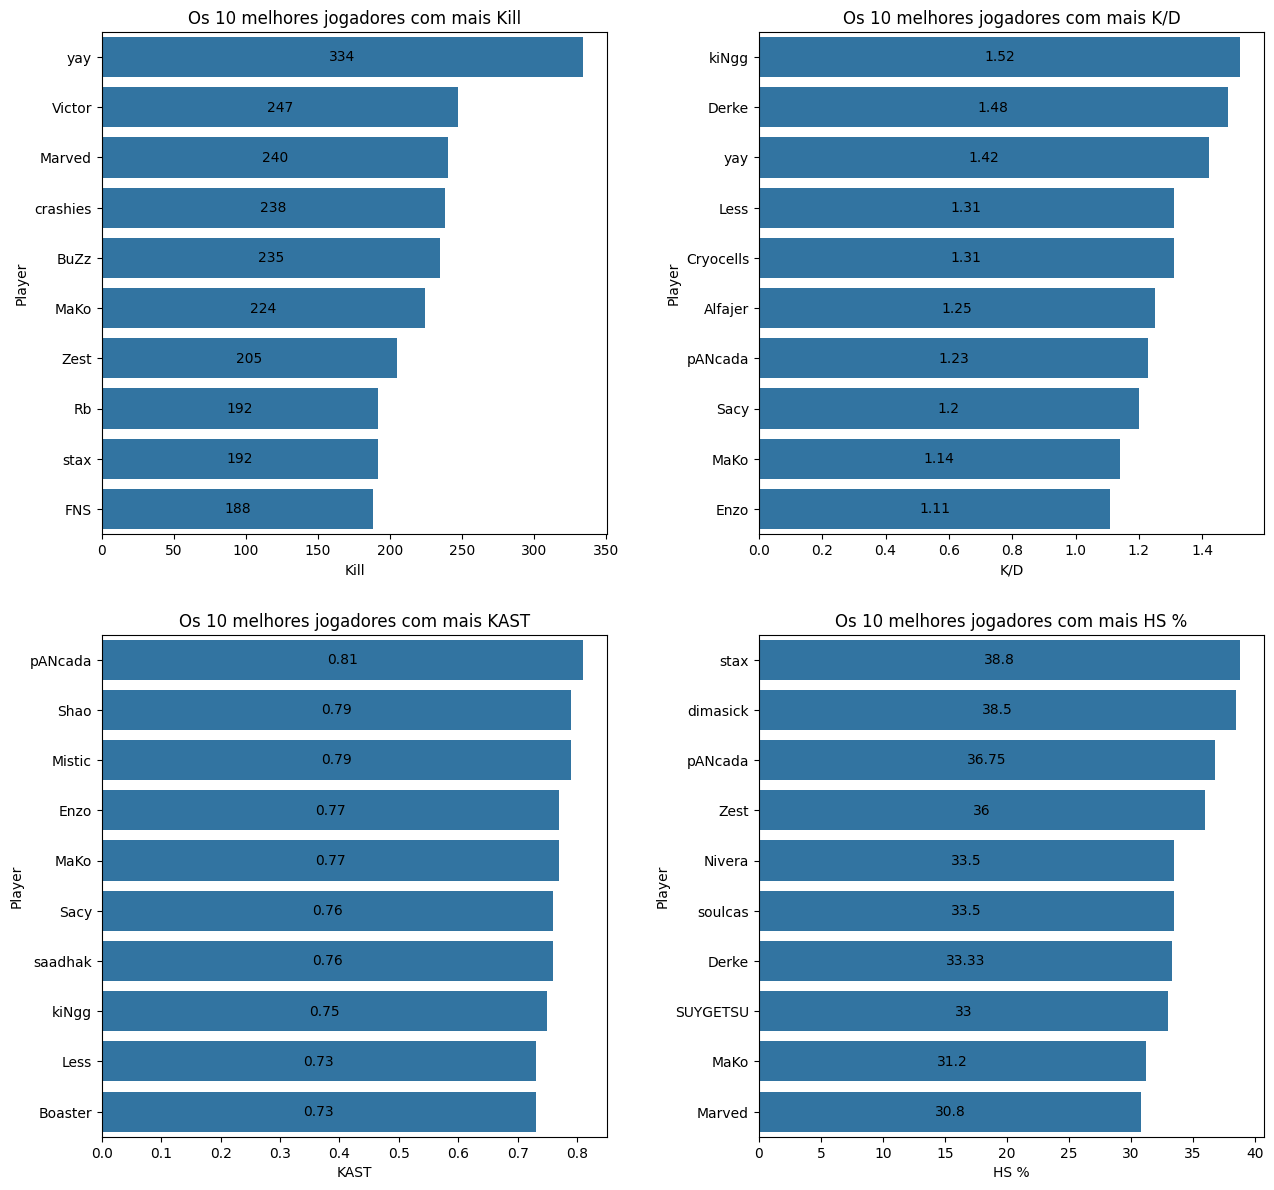

In [12]:
# Vendo os 10 melhores jogadores em várias estatísticas
column_list = ["Kill", "K/D", "KAST", "HS %"]

plt.figure(figsize=(15,30))
for i, col in enumerate(column_list):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=0.2, wspace=0.3)
    ax = sns.barplot(data=df.sort_values(by=col,ascending=False).head(10), x=col, y="Player")
    ax.bar_label(ax.containers[0], label_type="center")
    plt.title(f"Os 10 melhores jogadores com mais {col}")
    
plt.show();

**Vamos comparar dois jogadores, MaKo e pANcada, que têm estatísticas de 3 dos gráficos acima.**

In [13]:
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

p = df[df["Player"] == "pANcada"]
M = df[df["Player"] == "MaKo"]

data = [
    go.Scatterpolar(
        name = p.Player.values[0],
        r = [p["Kill"].values[0],p["Death"].values[0],p["Rounds Played"].values[0],p["Rounds Win"].values[0]],
        theta = ['Kill','Death','Rounds Played','Rounds Win'],
        fill = 'toself',
        line =  dict(
                color = 'cyan'
            )
        ),
    go.Scatterpolar(
            name = M.Player.values[0],
            r = [M['Kill'].values[0],M['Death'].values[0],M['Rounds Played'].values[0],M['Rounds Win'].values[0]],
            theta = ['Kill','Death','Rounds Played','Rounds Win'],
            fill = 'toself',
            line =  dict(
                color = 'orange'
            )
        )]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 200]
    )
  ),
  showlegend = True,
  title = "{} vs {} Stats Comparison".format(p.Player.values[0], M.Player.values[0])
)
fig = go.Figure(data=data, layout=layout)
fig.show()

Embora o Pancada tenha jogado menos rodadas, é possível ver que o número de rodadas que ele venceu e o número de mortes que ele sofreu são maiores em comparação com o Mako. Essa comparação não é uma referência para saber se dois jogadores são melhores que o outro. Deve-se observar que o Valorant é um jogo de equipe e essas estatísticas aumentarão e diminuirão junto com as estatísticas médias dos jogadores da equipe.

In [15]:
fig = px.scatter(
    data_frame=df,
    x="K/D",
    y="KAST",
    color="Team",
    size="Prize",
    trendline="lowess",
    title="Comparação de equipes com base em KAST e K/D",
    height=1000,
    opacity=0.8,
    size_max=30
)

# Personalizar layout
fig.update_layout(
    xaxis_title="Índice de mortes (K/D)",
    yaxis_title="Kill, Assist, Survive, Trade % (KAST)",
    template="plotly_white"  # Fundo branco
)

fig.show()